<a href="https://colab.research.google.com/github/esakenyun/Dashboard_Bike/blob/main/Riset_Bike_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- Nama: Reza Fahlevi Herdiyanto
- Email: rfahlevih@gmail.com
- Id Dicoding: rfahlevih12

## Menentukan Pertanyaan Bisnis

- Apakah Ada Hubungan Antara Suhu dan Jumlah Penggunaan Sepeda ? (Hari)
- Bagaimana Penggunaan Sepeda Berbeda antara Pengguna Tidak Terdaftar (Casual) dan Pengguna Terdaftar (Registered)? (Jam)

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load Data Day
day_df = pd.read_csv("https://raw.githubusercontent.com/esakenyun/BikeCSV/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Load Data Hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/esakenyun/BikeCSV/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
# Check Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Check Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [ ]:
# Merubah dteday menjadi date time
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Merubah dteday menjadi date time (Hour)
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Menghitung rata-rata suhu (temp) dan rata-rata penggunaan sepeda (cnt) dalam 1 hari
day_df = pd.read_csv("https://raw.githubusercontent.com/esakenyun/BikeCSV/main/day.csv")

mean_temp = day_df['temp'].mean()
mean_cnt = day_df['cnt'].mean()

print(f"Rata-rata suhu per hari: {mean_temp}")
print(f"Rata-rata jumlah penggunaan sepeda per hari : {mean_cnt}")


#Setelah menghitung diatas kita cari korelasinya antara suhu dan temp
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara suhu dan jumlah penggunaan sepeda perhari : {correlation}")


Rata-rata suhu per hari: 0.495384788508892
Rata-rata jumlah penggunaan sepeda per hari : 4504.3488372093025
Korelasi antara suhu dan jumlah penggunaan sepeda perhari : 0.6274940090334918


In [ ]:
#Menghitung rata-rata penggunaan sepeda per kategori (casual atau registered dalam dataset hour.csv)
mean_casual = hour_df['casual'].mean()
mean_registered = hour_df['registered'].mean()

print(f"Rata-Rata penggunaan sepeda dalam kategori casual : {mean_casual}")
print(f"Rata-Rata penggunaan sepeda dalam kategori registered: {mean_registered}")

#Membuat perbandingan antara penggunaan sepeda casual dan registered
perbandingan = mean_registered / mean_casual

print(f"Perbandingan penggunaan sepeda dalam kategori casual dan registered: 1 : {perbandingan}")



Rata-Rata penggunaan sepeda dalam kategori casual : 35.67621842453536
Rata-Rata penggunaan sepeda dalam kategori registered: 153.78686920996606
Perbandingan penggunaan sepeda dalam kategori casual dan registered: 1 : 4.310626966679946


## Visualization & Explanatory Analysis

### Pertanyaan 1:

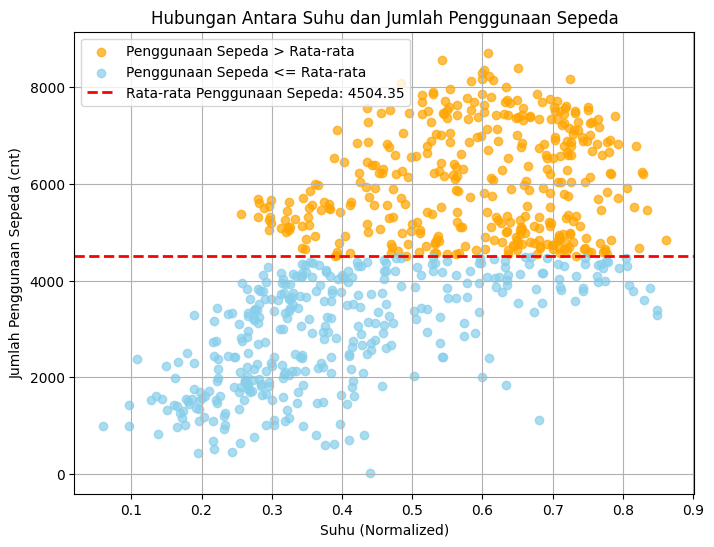

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv("https://raw.githubusercontent.com/esakenyun/BikeCSV/main/day.csv")

# Menghitung rata-rata penggunaan sepeda
mean_cnt = df['cnt'].mean()

# Membuat scatter plot dengan warna berbeda untuk nilai cnt di atas rata-rata dan di bawah rata-rata
plt.figure(figsize=(8, 6))
plt.scatter(df[df['cnt'] > mean_cnt]['temp'], df[df['cnt'] > mean_cnt]['cnt'], color='orange', alpha=0.7, label='Penggunaan Sepeda > Rata-rata')
plt.scatter(df[df['cnt'] <= mean_cnt]['temp'], df[df['cnt'] <= mean_cnt]['cnt'], color='skyblue', alpha=0.7, label='Penggunaan Sepeda <= Rata-rata')
plt.axhline(mean_cnt, color='red', linestyle='dashed', linewidth=2, label=f"Rata-rata Penggunaan Sepeda: {mean_cnt:.2f}")
plt.title('Hubungan Antara Suhu dan Jumlah Penggunaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.legend()
plt.grid(True)
plt.show()


### Pertanyaan 2:

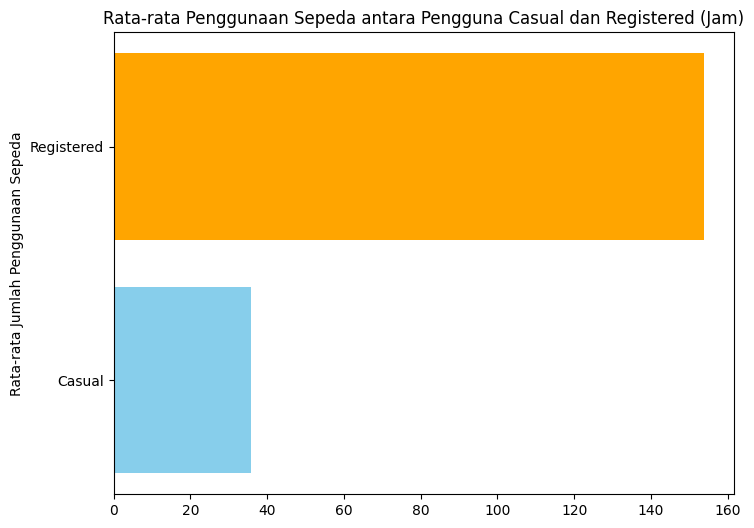

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
hour_df = pd.read_csv("https://raw.githubusercontent.com/esakenyun/BikeCSV/main/hour.csv")

# Menghitung rata-rata penggunaan sepeda per kategori (Casual dan Registered)
mean_casual = hour_df['casual'].mean()
mean_registered = hour_df['registered'].mean()

# Membuat bar plot
categories = ['Casual', 'Registered']
values = [mean_casual, mean_registered]

plt.figure(figsize=(8, 6))
plt.barh(categories, values, color=['skyblue', 'orange'])
plt.ylabel('Rata-rata Jumlah Penggunaan Sepeda')
plt.title('Rata-rata Penggunaan Sepeda antara Pengguna Casual dan Registered (Jam)')
plt.show()


## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

Kesimpulan dari pertanyaan 1 :

 Berdasarkan hasil analisis data yang telah dilakukan, berikut adalah beberapa poin penting:
* Rata-rata suhu per hari adalah 0.495384788508892. Ini berarti bahwa suhu rata-rata selama periode pengamatan adalah sekitar 0.5 (dalam skala yang telah dinormalisasi).
* Rata-rata jumlah penggunaan sepeda per hari adalah 4504.3488372093025. Ini menunjukkan bahwa sepeda digunakan sekitar 4504 kali setiap hari.
* Korelasi antara suhu dan jumlah penggunaan sepeda per hari adalah 0.6274940090334918. Nilai ini menunjukkan adanya korelasi positif yang cukup kuat antara suhu dan penggunaan sepeda. Dengan kata lain, semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda.



Kesimpulan dari pertanyaan 2 :

*  Kita dapat melihat bahwa rata-rata penggunaan sepeda oleh pengguna registered lebih tinggi dibandingkan dengan pengguna casual. Ini menunjukkan bahwa sepeda lebih sering digunakan oleh pengguna yang terdaftar dibandingkan dengan mereka yang menggunakan sepeda secara casual.

*   Dapat kita lihat juga pada perhitungan ketika dalam proses EDA ada perbandingan antara penggunaan sepeda dengan kategori casual dan kategori registered dengan perbandingan 1 : 4.3. Dapat disimpulkan bahwa memang rata-rata penggunaan sepeda lebih condong kepada yang registered.



